<a href="https://colab.research.google.com/github/zeynepsenak/Stockprediction-CNN-RNN-/blob/master/STOCKPREDICTIPNCNN(np_classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
#CNN - Stock Prediction 
import numpy as np
import os
import pandas_datareader as web
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import MinMaxScaler
from PIL import Image
import cv2
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, Activation 
from keras import regularizers
plt.style.use('fivethirtyeight')

In [55]:
#x_train-images Folder
dirName = 'xtr_img'
if not os.path.exists(dirName):
    os.mkdir(dirName)
    print("Directory " , dirName ,  " Created ")
else:    
    print("Directory " , dirName ,  " already exists")

Directory  xtr_img  already exists


In [56]:
#x_test-images Folder
dirName = 'xtest_img'
if not os.path.exists(dirName):
    os.mkdir(dirName)
    print("Directory " , dirName ,  " Created ")
else:    
    print("Directory " , dirName ,  " already exists")

Directory  xtest_img  already exists


In [57]:
df = web.DataReader('AAPL', data_source='yahoo', start='2004-01-01', end='2020-01-01') 
def loaddata():
    #Visualizieren die Schlusspreisverlauff
    plt.figure(figsize=(16,8))
    plt.title('_Schlusspreisverlauf_')
    plt.plot(df['Close'])
    plt.xlabel('Datum',fontsize=18)
    plt.ylabel('Schlusspreis USD ($)',fontsize=18)
    plt.show()

In [58]:
#x_train (img)
def convert_img(path,xtrainzahl, imgname): #3102-0
  img = Image.fromarray(prex_train[xtrainzahl], 'RGB')
  img.save(path + imgname)
  if(i%100==0):
    print(str(xtrainzahl) + 'ist fertig')

In [59]:
#x_test (img)
def testconvert_img(path, xtestzahl, imgname): #3161-4027
  img = Image.fromarray(prex_test[xtestzahl], 'RGB')
  img.save(path + imgname)
  if(i%100==0):
    print(str(xtestzahl) + 'ist fertig')

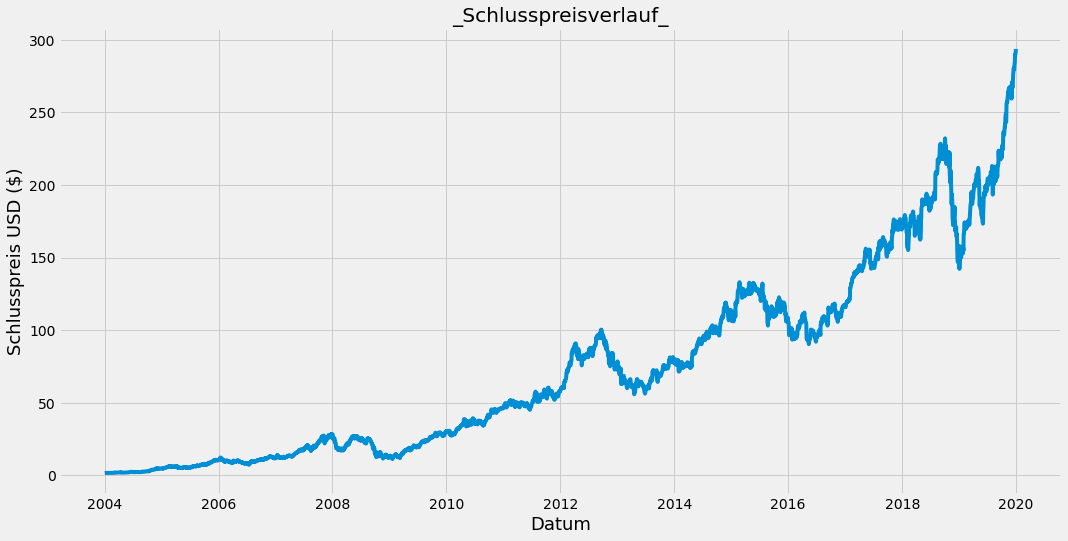

In [60]:
loaddata()

In [61]:
data_cl = df.filter(['Close']) #Schluss (Close) Column von Daten : data_cl
clset = data_cl.values #numpy array - data_cl : cl_set
data_op = df.filter(['Open']) #Öffnüng (Open) Column von Daten : data_op
opset = data_op.values #numpy array - data_op : op_set
data_vol = df.filter(['Volume']) #Volumen (Volume) Column von Daten : data_vol
volset = data_vol.values #numpy array - data_vol : vol_set

# len(clset) : 4027

training_data_len = math.ceil( len(clset) *.8) #Train Reiheanzahl


In [62]:
yclset=[]
for i in range(120,len(clset)):
  if (clset[i,0]>clset[i-1,0]):
    yclset.append(1)
  else:
    yclset.append(0)
print(yclset) 

[1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 

In [65]:
#Skalierung zwischen 0-1 
sc = MinMaxScaler(feature_range=(0, 1)) 
sc_data = sc.fit_transform(clset)

sc_data.shape

(4027, 1)

In [66]:
train_data = sc_data[0:training_data_len  , : ] #scaliertes trainingsset

#Data teilen: prex_train-y_train
prex_train=[]
y_train=[]

#121. günün kapanış fiyatını tahmin etmek için önceki 120 günlük veri seti

for i in range(120,len(train_data)):
    prex_train.append(train_data[i-120:i, 0]) 
    y_train.append(yclset[i])
   

prex_train = np.array(prex_train)

In [67]:
prex_train = np.asarray(prex_train.reshape(3102,12,10))
prex_train.shape

(3102, 12, 10)

In [68]:
#0-999 train img create:
for i in range(0, 999):
  path = 'xtr_img/'
  xtrainzahl = i
  imgname = 'xtrimg' + str(i) + '.png'
  convert_img(path,xtrainzahl, imgname)

0ist fertig
100ist fertig
200ist fertig
300ist fertig
400ist fertig
500ist fertig
600ist fertig
700ist fertig
800ist fertig
900ist fertig


In [69]:
#999-1999 train img create:
for i in range(999, 1999):
  path = 'xtr_img/'
  xtrainzahl = i
  imgname = 'xtrimg' + str(i) + '.png'
  convert_img(path, xtrainzahl, imgname)

1000ist fertig
1100ist fertig
1200ist fertig
1300ist fertig
1400ist fertig
1500ist fertig
1600ist fertig
1700ist fertig
1800ist fertig
1900ist fertig


In [70]:
#1999-3102 train img create:
for i in range(1999, 3102):
  path = 'xtr_img/'
  xtrainzahl = i
  imgname = 'xtrimg' + str(i) + '.png'
  convert_img(path, xtrainzahl, imgname)

2000ist fertig
2100ist fertig
2200ist fertig
2300ist fertig
2400ist fertig
2500ist fertig
2600ist fertig
2700ist fertig
2800ist fertig
2900ist fertig
3000ist fertig
3100ist fertig


In [75]:
y_train[3101]

0

In [76]:
x_train = []
xtrlabels = []
def xTrainProcess(path):
  p = 0
  x = 0
  images = [f for f in os.listdir(path)]
  for iname in images:
    images = str(path + '/' + iname)
    img = cv2.imread(images, cv2.IMREAD_COLOR)
    x_train.append(img)
    xtrlabels.append(x)
    x = x+1
    p = p+1

    if(p%100==0):
      print(str(p) + ' ist fertig')

In [77]:
path = '/content/xtr_img'
xTrainProcess(path)

100 ist fertig
200 ist fertig
300 ist fertig
400 ist fertig
500 ist fertig
600 ist fertig
700 ist fertig
800 ist fertig
900 ist fertig
1000 ist fertig
1100 ist fertig
1200 ist fertig
1300 ist fertig
1400 ist fertig
1500 ist fertig
1600 ist fertig
1700 ist fertig
1800 ist fertig
1900 ist fertig
2000 ist fertig
2100 ist fertig
2200 ist fertig
2300 ist fertig
2400 ist fertig
2500 ist fertig
2600 ist fertig
2700 ist fertig
2800 ist fertig
2900 ist fertig
3000 ist fertig
3100 ist fertig


In [78]:
model = Sequential()

model.add(Conv2D(32, (3, 3),
                 padding='same',
                 activation='relu',
                 input_shape=(12,10,3),
                 kernel_regularizer=regularizers.l2(0.01),  #overfiting mitigation
                 activity_regularizer=regularizers.l1(0.01))
)
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
#model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (1, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(128, (1, 1), padding='same', activation='relu'))
#model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(Dropout(0.1))

model.add(Conv2D(64, (1, 1), padding='same', activation='relu'))
model.add(Conv2D(64, (1, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 12, 10, 32)        896       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 10, 8, 32)         9248      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 4, 32)          0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 5, 4, 32)          0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 5, 4, 64)          18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 2, 2, 64)          0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 2, 2, 64)         

In [79]:
x_train = np.asarray(x_train)

In [80]:
#Compile => optimizer:adam loss:ortalama kara hatası
model.compile(optimizer='adam', loss='mean_squared_error')

In [81]:
#Train das Modell
model.fit(x_train, y_train, batch_size=4, epochs=100)

Epoch 1/100
3102/3102 [==============================] - 6s 2ms/step - loss: 46.3962
Epoch 2/100
3102/3102 [==============================] - 5s 2ms/step - loss: 0.6690
Epoch 3/100
3102/3102 [==============================] - 5s 2ms/step - loss: 0.5681
Epoch 4/100
3102/3102 [==============================] - 5s 2ms/step - loss: 0.5446
Epoch 5/100
3102/3102 [==============================] - 5s 2ms/step - loss: 0.5342
Epoch 6/100
3102/3102 [==============================] - 5s 2ms/step - loss: 0.5287
Epoch 7/100
3102/3102 [==============================] - 5s 2ms/step - loss: 0.5244
Epoch 8/100
3102/3102 [==============================] - 5s 2ms/step - loss: 0.5206
Epoch 9/100
3102/3102 [==============================] - 5s 2ms/step - loss: 0.5168
Epoch 10/100
3102/3102 [==============================] - 5s 2ms/step - loss: 0.5130
Epoch 11/100
3102/3102 [==============================] - 5s 2ms/step - loss: 0.5090
Epoch 12/100
3102/3102 [==============================] - 5s 2ms/step - l

In [85]:
#Test Daten
test_data = sc_data[training_data_len - 120: , : ]
#prex_test und y_test Daten
xi = 0
prex_test = []
y_test =  []
for i in range(120,len(test_data)):
    prex_test.append(test_data[i-120:i,0])    
    xi = xi + 1
    y_test.append(yclset[i+2982])

In [87]:
len(y_test)

805

In [88]:
prex_test = np.array(prex_test)
prex_test = np.asarray(prex_test.reshape(805,12,10))
prex_test.shape

(805, 12, 10)

In [89]:
for i in range(0,xi):
  path='xtest_img/'
  xtestzahl = i 
  imgname = 'xtestimg' + str(i) + '.png'
  testconvert_img(path, xtestzahl, imgname)

0ist fertig
100ist fertig
200ist fertig
300ist fertig
400ist fertig
500ist fertig
600ist fertig
700ist fertig
800ist fertig


In [90]:
x_test = []
xtestlabels = []
def xTestProcess(path):
  p = 0
  x = 0
  images = [f for f in os.listdir(path)]
  for iname in images:
    images = str(path + '/' + iname)
    img = cv2.imread(images, cv2.IMREAD_COLOR)
    x_test.append(img)
    xtestlabels.append(x)
    x = x+1
    p = p+1

    if(p%100==0):
      print(str(p) + ' ist fertig')

In [91]:
path = '/content/xtest_img'
xTestProcess(path)

100 ist fertig
200 ist fertig
300 ist fertig
400 ist fertig
500 ist fertig
600 ist fertig
700 ist fertig
800 ist fertig


In [92]:
x_test = np.asarray(x_test)
#Vorhergesagte Preis Werte Model
predictions = model.predict(x_test) 
predictions = sc.inverse_transform(predictions)#Undo Skalierung
x_test.shape

(805, 12, 10, 3)

In [93]:
predictions[758]

array([293.65], dtype=float32)

In [94]:
#RMSE Wert - Perfektion des Modells - (Perfekt:0)
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

293.10631766682997

In [95]:
#Plot/Create the data for the graph
train = yclset[:training_data_len]
valid = yclset[training_data_len:]
valid['Predictions'] = predictions

#Graph
plt.figure(figsize=(16,8))
plt.title('_Aktienprognose_')
plt.xlabel('Datum', fontsize=18)
plt.ylabel('Schluss Preis USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Wert', 'Vorhergesagte Werte'], loc='lower right')
plt.show()

TypeError: ignored

In [96]:
#Schluss Werte und vorhergesagte Werte
valid

[1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
